In [17]:
import pandas as pd
import sqlite3
import seaborn as sns

In [3]:
# connect to sqlite

conn = sqlite3.connect("../data/bootcamp_db")

In [5]:
query = """
select customer_id,
       country,
       count(distinct invoice) as number_orders,
       max(invoice_date) as last_invoice_date,
       sum(total_order_value) as total_spent,
       count(distinct stock_code) as number_distinct_items
from online_transactions_fixed
group by customer_id, country
"""

customer_data = pd.read_sql(query, conn)

In [6]:
customer_data.shape

(4371, 6)

In [7]:
customer_data.head()

,customer_id,country,number_orders,last_invoice_date,total_spent,number_distinct_items
0,u12346,United Kingdom,2,2011-01-18T10:17:00,0.00,1
1,u12347,Iceland,7,2011-12-07T15:52:00,4310.00,103
2,u12348,Finland,4,2011-09-25T13:13:00,1437.24,21
3,u12349,Italy,1,2011-11-21T09:51:00,1457.55,72
4,u1235,Norway,1,2011-02-02T16:01:00,294.40,16


In [8]:
# creating segments based on the country

def create_customer_segments(i):
    if i == "United Kingdom":
        return "UK customer"
    else:
        return "Non-UK customer"

In [9]:
customer_data['customer_segment']  = customer_data.country.apply(create_customer_segments)

In [10]:
customer_data.head()

,customer_id,country,number_orders,last_invoice_date,total_spent,number_distinct_items,customer_segment
0,u12346,United Kingdom,2,2011-01-18T10:17:00,0.00,1,UK customer
1,u12347,Iceland,7,2011-12-07T15:52:00,4310.00,103,Non-UK customer
2,u12348,Finland,4,2011-09-25T13:13:00,1437.24,21,Non-UK customer
3,u12349,Italy,1,2011-11-21T09:51:00,1457.55,72,Non-UK customer
4,u1235,Norway,1,2011-02-02T16:01:00,294.40,16,Non-UK customer


In [11]:
# look at distribution of customers

customer_data.customer_segment.value_counts()

customer_segment
UK customer        3943
Non-UK customer     428
Name: count, dtype: int64

In [12]:
# can view as % instead of whole numbers 
customer_data.customer_segment.value_counts(normalize=True)

customer_segment
UK customer        0.902082
Non-UK customer    0.097918
Name: proportion, dtype: float64

In [13]:
# look at the UK customer segment

uk_customers = customer_data[customer_data.customer_segment == "UK customer"]
uk_customers.head()

,customer_id,country,number_orders,last_invoice_date,total_spent,number_distinct_items,customer_segment
0,u12346,United Kingdom,2,2011-01-18T10:17:00,0.00,1,UK customer
335,u12747,United Kingdom,11,2011-12-07T14:34:00,4196.01,42,UK customer
336,u12748,United Kingdom,217,2011-12-09T12:20:00,29819.99,1767,UK customer
337,u12749,United Kingdom,8,2011-12-06T09:56:00,3868.20,160,UK customer
382,u1282,United Kingdom,4,2011-12-06T15:12:00,942.34,55,UK customer


In [14]:
uk_customers.describe()

,number_orders,total_spent,number_distinct_items
count,3943.000000,3943.000000,3943.000000
mean,4.966523,1728.474535,60.475273
std,8.479952,6664.878209,81.677559
min,1.000000,-1192.200000,1.000000
25%,1.000000,283.590000,15.000000
50%,3.000000,626.090000,35.000000
75%,5.000000,1520.295000,77.000000
max,217.000000,259657.300000,1767.000000


In [16]:
non_uk_customers.describe()

,number_orders,total_spent,number_distinct_items
count,428.000000,428.000000,428.000000
mean,5.158879,3430.122313,66.535047
std,13.438140,17062.453150,113.323194
min,1.000000,-227.440000,1.000000
25%,1.000000,383.607500,19.000000
50%,2.000000,869.930000,37.000000
75%,5.000000,2319.860000,80.250000
max,243.000000,278778.020000,1792.000000


In [15]:
non_uk_customers = customer_data[customer_data.customer_segment == "Non-UK customer"]
non_uk_customers.head()

,customer_id,country,number_orders,last_invoice_date,total_spent,number_distinct_items,customer_segment
1,u12347,Iceland,7,2011-12-07T15:52:00,4310.00,103,Non-UK customer
2,u12348,Finland,4,2011-09-25T13:13:00,1437.24,21,Non-UK customer
3,u12349,Italy,1,2011-11-21T09:51:00,1457.55,72,Non-UK customer
4,u1235,Norway,1,2011-02-02T16:01:00,294.40,16,Non-UK customer
5,u12352,Norway,8,2011-11-03T14:37:00,1265.41,57,Non-UK customer


Findings:
- The Non UK customer segment makes up 10% of our customer base but.. 
- On average the non UK customser segments spends twice as much as UK customers (3.4k vs 1.7k), and 75% of non UK customers spend 2.3k vs 1.5k, even though there are no difference in average/median orders placed.
- Next steps would be to calculate the recency and explore the outliers...
- Suggestion to company - increase marketing spend for non UK customers

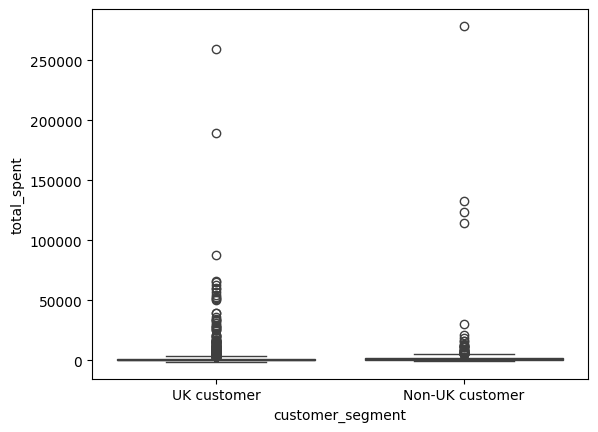

In [18]:
sns.boxplot(x="customer_segment", y="total_spent", data=customer_data);

In [ ]:
# for reference, code to normalize a variable


customer_data['total_spent_normalised'] = (customer_data.total_spent - customer_data.total_spent.min())/(customer_data.total_spent.max() - customer_data.total_spent.min())

